<a href="https://colab.research.google.com/github/YADHUSUDHAN/AIL411-DEEP-LEARNING-LAB-KTU/blob/main/outlier_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Libraries**

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from scipy import stats
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN
import seaborn as sns
import matplotlib.pyplot as plt


# **Loading the Dataset and Handling Missing Values**

In [ ]:
# Load the Titanic dataset
titanic_df = sns.load_dataset('titanic')

# Identify and handle missing values
missing_values = titanic_df.isnull().sum()
print("Missing Values:\n", missing_values)

# Handle missing values
titanic_df['age'].fillna(titanic_df['age'].median(), inplace=True)
titanic_df['embarked'].fillna(titanic_df['embarked'].mode()[0], inplace=True)

# Identify and handle missing values
missing_values = titanic_df.isnull().sum()
print("Missing Values:\n", missing_values)


Missing Values:
 survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64
Missing Values:
 survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


# **Creating New Features and Encoding Categorical Variables**

In [ ]:
# Create new features ('FamilySize')
titanic_df['FamilySize'] = titanic_df['sibsp'] + titanic_df['parch']

# Encode categorical variables ('Sex' and 'Embarked')
label_encoder = LabelEncoder()
titanic_df['sex'] = label_encoder.fit_transform(titanic_df['sex'])
titanic_df = pd.get_dummies(titanic_df, columns=['embarked'], prefix=['embarked'])


In [ ]:
titanic_df

,survived,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,deck,embark_town,alive,alone,FamilySize,embarked_C,embarked_Q,embarked_S
0,0,3,1,22.0,1,0,7.2500,Third,man,True,NaN,Southampton,no,False,1,0,0,1
1,1,1,0,38.0,1,0,71.2833,First,woman,False,C,Cherbourg,yes,False,1,1,0,0
2,1,3,0,26.0,0,0,7.9250,Third,woman,False,NaN,Southampton,yes,True,0,0,0,1
3,1,1,0,35.0,1,0,53.1000,First,woman,False,C,Southampton,yes,False,1,0,0,1
4,0,3,1,35.0,0,0,8.0500,Third,man,True,NaN,Southampton,no,True,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,Second,man,True,NaN,Southampton,no,True,0,0,0,1
887,1,1,0,19.0,0,0,30.0000,First,woman,False,B,Southampton,yes,True,0,0,0,1
888,0,3,0,28.0,1,2,23.4500,Third,woman,False,NaN,Southampton,no,False,3,0,0,1
889,1,1,1,26.0,0,0,30.0000,First,man,True,C,Cherbourg,yes,True,0,1,0,0


# **Removing Duplicate Rows**

In [ ]:
# Check for and remove duplicate rows
titanic_df.drop_duplicates(inplace=True)


# **Visualizing Outliers**

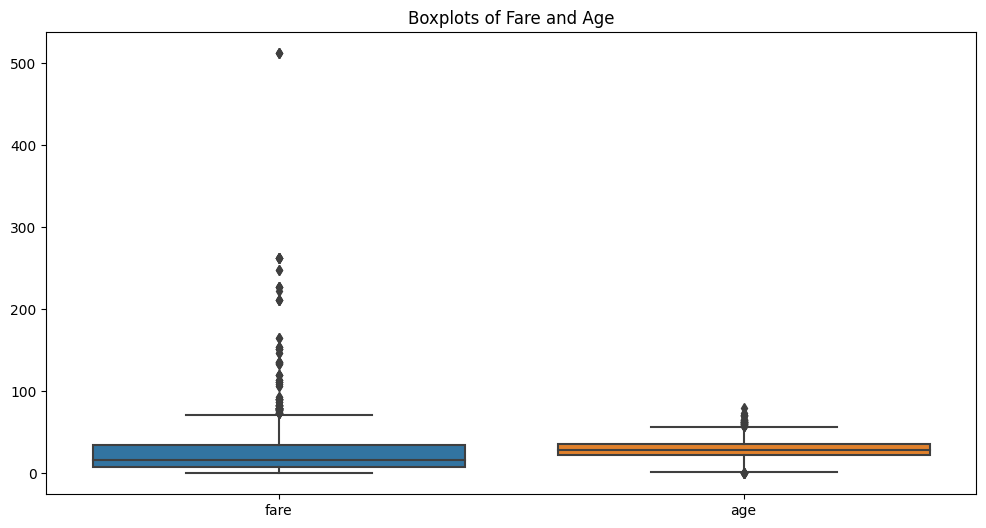

In [ ]:
# Visualize outliers using boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(data=titanic_df[['fare', 'age']])
plt.title('Boxplots of Fare and Age')
plt.show()

# **Detecting Outliers**

In [ ]:
# Using Z-Score
z_scores = np.abs(stats.zscore(titanic_df[['fare', 'age']]))
outliers_zscore = (z_scores > 3).all(axis=1)

# Using Isolation Forest
iso_forest = IsolationForest(contamination=0.05)
outliers_iso_forest = iso_forest.fit_predict(titanic_df[['fare', 'age']])
outliers_iso_forest = (outliers_iso_forest == -1)

# Using DBSCAN
dbscan = DBSCAN(eps=3, min_samples=2)
outliers_dbscan = dbscan.fit_predict(titanic_df[['fare', 'age']])
outliers_dbscan = (outliers_dbscan == -1)

# Using IQR for 'Fare' and 'Age'
Q1 = titanic_df[['fare', 'age']].quantile(0.25)
Q3 = titanic_df[['fare', 'age']].quantile(0.75)
IQR = Q3 - Q1


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


# **Identifying and Analyzing Outliers**

In [ ]:
# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers for 'Fare' and 'Age'
outliers_fare = (titanic_df['fare'] < lower_bound['fare']) | (titanic_df['fare'] > upper_bound['fare'])
outliers_age = (titanic_df['age'] < lower_bound['age']) | (titanic_df['age'] > upper_bound['age'])



In [ ]:
# Analyze the outliers generated by different methods
print("Outliers by Z-Score:\n", outliers_zscore.value_counts())
print("Outliers by Isolation Forest:\n", pd.Series(outliers_iso_forest).value_counts())

# Count outliers for DBSCAN
outliers_count_dbscan = np.sum(outliers_dbscan == -1)
print("Outliers by DBSCAN:", outliers_count_dbscan)

# Display the number of outliers using the IQR method
print("Outliers by IQR:\n")
print("Outliers in 'Fare':", outliers_fare.sum())
print("Outliers in 'Age':", outliers_age.sum())


Outliers by Z-Score:
 False    781
dtype: int64
Outliers by Isolation Forest:
 False    742
True      39
dtype: int64
Outliers by DBSCAN: 0
Outliers by IQR:

Outliers in 'Fare': 102
Outliers in 'Age': 39


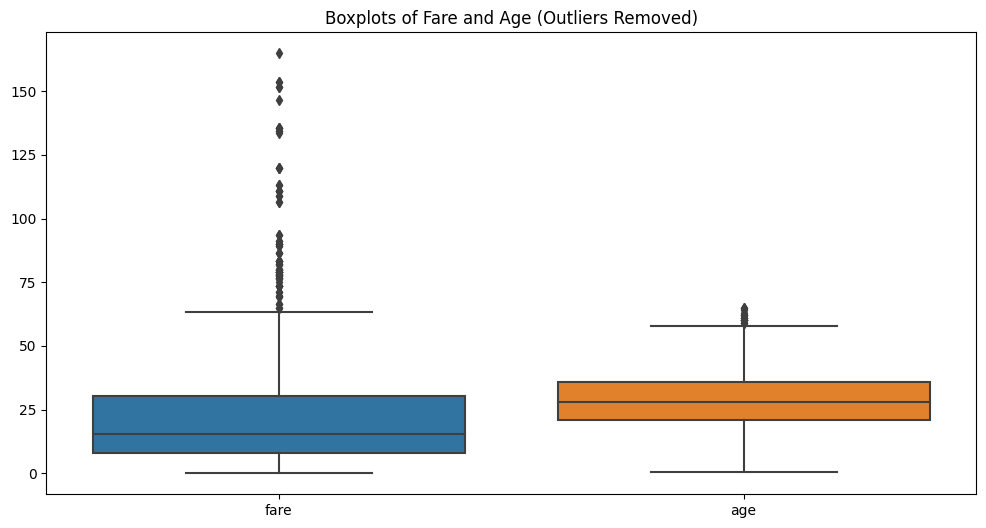

In [ ]:
# Filter out outliers
titanic_no_outliers = titanic_df[~outliers_iso_forest]

# Visualize boxplot without outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=titanic_no_outliers[['fare', 'age']])
plt.title('Boxplots of Fare and Age (Outliers Removed)')
plt.show()